Conexión a MySQL

In [62]:
# Primero, instalamos las bibliotecas que utilizaremos en la terminal con pip install
# Instaladas las librerías necesarias, las importamos 
import pandas as pd
from sqlalchemy import create_engine

# Conectamos a la base de datos
host ='localhost'
database='olympics'
user='root'
password='4443'

# Creamos una cadena de conexión
cadena_conexion = f'mysql+mysqlconnector://{user}:{password}@{host}/{database}'

# Creamos el motor de conexión
motor = create_engine(cadena_conexion)

# Creamos una lista de las tablas a cargar
nombres_tablas = ['sport', 'event', 'competitor_event', 'games_competitor', 'games', 'games_city', 'city', 'person', 'person_region', 'noc_region', 'medal']

# Usamos el método globals() y con un bucle for leemos cada tabla en un DataFrame para almacenarlo en el diccionario
for nombre in nombres_tablas:
    query = f'SELECT * FROM {nombre}'
    df_name = f'df_{nombre}'
    globals()[df_name] = pd.read_sql(query, con=motor)

Obtenemos información de los DF

In [63]:
df_games.head()

,id,games_year,games_name,season
0,1,1992,1992 Summer,Summer
1,2,2012,2012 Summer,Summer
2,3,1920,1920 Summer,Summer
3,4,1900,1900 Summer,Summer
4,5,1988,1988 Winter,Winter


In [64]:
df_city.tail()

,id,city_name
37,38,Sapporo
38,39,Chamonix
39,40,St. Louis
40,41,Sankt Moritz
41,42,Garmisch-Partenkirchen


In [65]:
df_medal.dtypes

id             int64
medal_name    object
dtype: object

In [66]:
df_sport.shape

(66, 2)

In [67]:
df_sport.info

<bound method DataFrame.info of     id        sport_name
0    1       Aeronautics
1    2     Alpine Skiing
2    3          Alpinism
3    4           Archery
4    5  Art Competitions
..  ..               ...
61  62        Tug-Of-War
62  63        Volleyball
63  64        Water Polo
64  65     Weightlifting
65  66         Wrestling

[66 rows x 2 columns]>

Crear columnas

In [68]:
# ejemplo nos piden nueva columna que indique la IMC de los competidores (peso/(altural*altura))

import pandas as pd 

df_person['IMC']=(df_person['weight']/(df_person['height']*df_person['height']))*10000

print(df_person)

            id                     full_name gender  height  weight        IMC
0            1                     A Dijiang      M     180      80  24.691358
1            2                      A Lamusi      M     170      60  20.761246
2            3           Gunnar Nielsen Aaby      M       0       0        NaN
3            4          Edgar Lindenau Aabye      M       0       0        NaN
4            5      Christine Jacoba Aaftink      F     185      82  23.959094
...        ...                           ...    ...     ...     ...        ...
128849  135567  Aleksandr Viktorovich Zyuzin      M     183      72  21.499597
128850  135568        Olga Igorevna Zyuzkova      F     171      69  23.597004
128851  135569                    Andrzej ya      M     179      89  27.776911
128852  135570                      Piotr ya      M     176      59  19.047004
128853  135571            Tomasz Ireneusz ya      M     185      96  28.049671

[128854 rows x 6 columns]


In [69]:
# nueva columna 0 si es hombre 1 si es mujer

df_person['boolean_gender']=['1' if x == 'F' else '0' for x in df_person['gender']]

print(df_person)

            id                     full_name gender  height  weight  \
0            1                     A Dijiang      M     180      80   
1            2                      A Lamusi      M     170      60   
2            3           Gunnar Nielsen Aaby      M       0       0   
3            4          Edgar Lindenau Aabye      M       0       0   
4            5      Christine Jacoba Aaftink      F     185      82   
...        ...                           ...    ...     ...     ...   
128849  135567  Aleksandr Viktorovich Zyuzin      M     183      72   
128850  135568        Olga Igorevna Zyuzkova      F     171      69   
128851  135569                    Andrzej ya      M     179      89   
128852  135570                      Piotr ya      M     176      59   
128853  135571            Tomasz Ireneusz ya      M     185      96   

              IMC boolean_gender  
0       24.691358              0  
1       20.761246              0  
2             NaN              0  
3      

In [70]:
# ejemplo columna condicion IMC 

df_person['cat_IMC']=['bajo' if x < 18.5 else ('normal' if x < 24.9 else 'sobrepeso') for x in df_person['IMC']]


print(df_person)


            id                     full_name gender  height  weight  \
0            1                     A Dijiang      M     180      80   
1            2                      A Lamusi      M     170      60   
2            3           Gunnar Nielsen Aaby      M       0       0   
3            4          Edgar Lindenau Aabye      M       0       0   
4            5      Christine Jacoba Aaftink      F     185      82   
...        ...                           ...    ...     ...     ...   
128849  135567  Aleksandr Viktorovich Zyuzin      M     183      72   
128850  135568        Olga Igorevna Zyuzkova      F     171      69   
128851  135569                    Andrzej ya      M     179      89   
128852  135570                      Piotr ya      M     176      59   
128853  135571            Tomasz Ireneusz ya      M     185      96   

              IMC boolean_gender    cat_IMC  
0       24.691358              0     normal  
1       20.761246              0     normal  
2        

In [71]:
# verificamos que funciona

df_person[df_person['IMC'] < 18.5]

,id,full_name,gender,height,weight,IMC,boolean_gender,cat_IMC
7,8,"Cornelia ""Cor"""" Aalten (-Strannood)""",F,168,0,0.000000,1,bajo
20,21,Ragnhild Margrethe Aamodt,F,163,0,0.000000,1,bajo
62,65,Patimat Abakarova,F,165,49,17.998163,1,bajo
91,95,Georgia Abatzidou,F,155,43,17.898023,1,bajo
97,101,Adeyemi Abayomi,M,170,51,17.647059,0,bajo
...,...,...,...,...,...,...,...,...
128655,135369,Dino Zucchi,M,192,0,0.000000,0,bajo
128696,135410,Zaidatul Husniah Zulkifli,F,156,40,16.436555,1,bajo
128759,135477,Vaida sinait,F,167,50,17.928215,1,bajo
128762,135480,Geeta Zutshi,F,167,51,18.286780,1,bajo


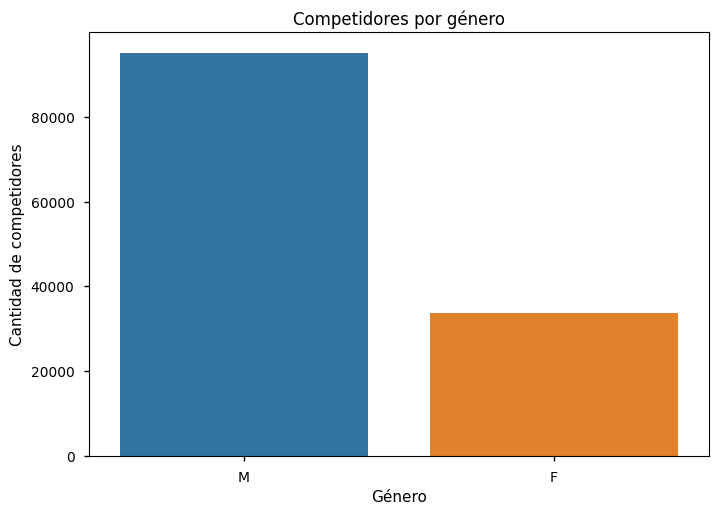

In [72]:
# Gráfico de una variable categórica: Haremos recuento de gender

#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Definimos un estilo
plt.style.use('seaborn-v0_8-notebook')

sns.countplot(x='gender', data=df_person, hue='gender')
plt.xlabel('Género')
plt.ylabel('Cantidad de competidores')
plt.title('Competidores por género')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


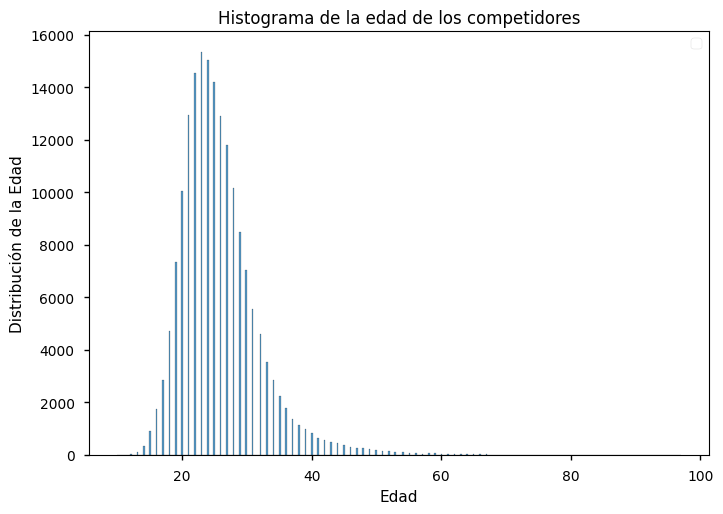

In [73]:
# gráfica de una variable numérica: age

sns.histplot(df_games_competitor['age'], kde=False)
plt.xlabel('Edad')
plt.ylabel('Distribución de la Edad')
plt.title('Histograma de la edad de los competidores')
plt.legend( )
plt.show()

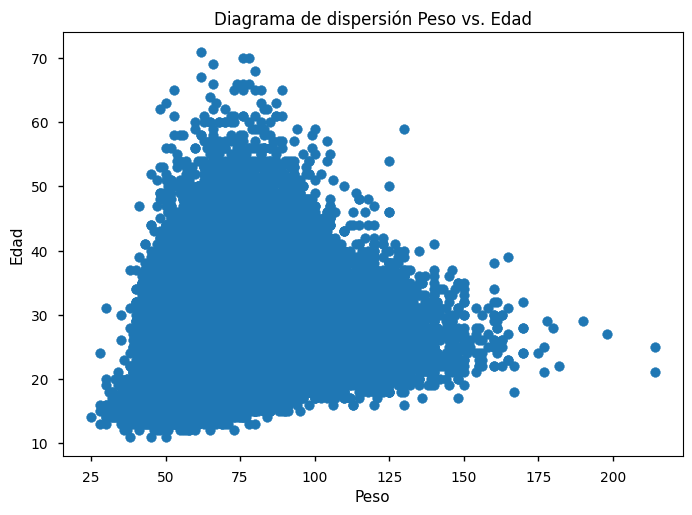

In [74]:
# gráfica que relacione dos variables numéricas: peso y edad

# si las variables están en distinto df los unimos antes:
data_merged = pd.merge(df_person, df_games_competitor, left_on='id', right_on='person_id')

data_filtered = data_merged[data_merged['weight'] != 0]

# si las variables están en el mismo df:
plt.scatter(data_filtered['weight'], data_filtered['age'])
plt.xlabel('Peso')
plt.ylabel('Edad')
plt.title('Diagrama de dispersión Peso vs. Edad')
plt.show()

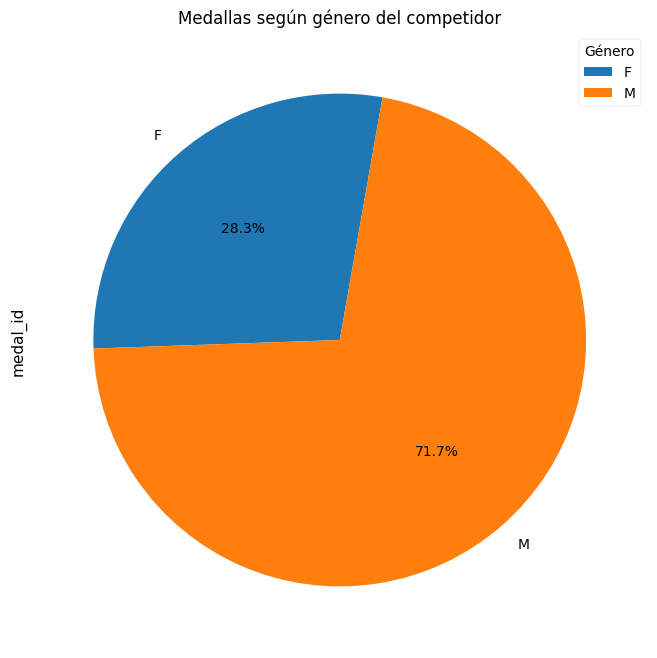

In [75]:
# Una numérica y una categórica: medallas según género


# Unimos DF
nuevo_df= pd.merge(df_competitor_event, df_games_competitor, left_on='competitor_id', right_on='id')

df_person['id_person'] = df_person['id']

df_final = pd.merge(nuevo_df, df_person, left_on='person_id', right_on='id_person')

# Ejemplo con un Pie
medallas_por_genero = df_final.groupby('gender')['medal_id'].count()

# Creamos gráfico de pastel
plt.figure(figsize=(14, 8))
medallas_por_genero.plot(kind='pie', autopct='%1.1f%%', startangle=80)

plt.title('Medallas según género del competidor')
 
plt.legend(title='Género')
plt.show()

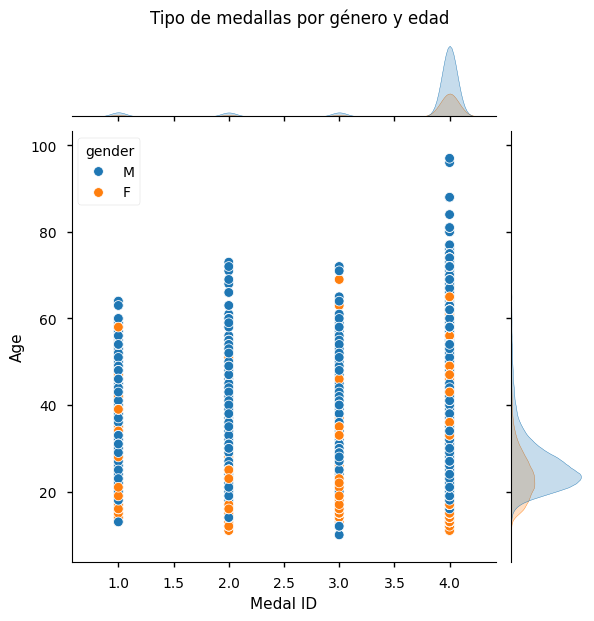

In [85]:
# Graficar dos variables categóricas y una numérica: tipo de medallas por género y edad
# Unimos DF
nuevo_df= pd.merge(df_competitor_event, df_games_competitor, left_on='competitor_id', right_on='id')

df_person['id_person'] = df_person['id']

df_final = pd.merge(nuevo_df, df_person, left_on='person_id', right_on='id_person')

g = sns.jointplot(x='medal_id', y='age', data= df_final, hue='gender')
g.set_axis_labels('Medal ID', 'Age')

g.fig.suptitle('Tipo de medallas por género y edad', y=1.03)  # Ajustar la posición del título


plt.show()